<a href="https://colab.research.google.com/github/ChaitanyaGadde98/national-anthems-classification-nlp/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "tensorflow>=1.15,<2.0"
!pip install --upgrade tensorflow-hub
!pip install pandas
!pip install pygal_maps_world

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow<2.0,>=1.15 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0rc0, 2.12.0rc1)
ERROR: No matching distribution found for tensorflow<2.0,>=1.15
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
import tensorflow_hub as hub
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def download_dataset_file(URL):
  response = requests.get(URL)
  with open('anthems.csv', 'w') as f:
      f.write(response.content.decode('utf-8'))

In [4]:
DATSET_URL = "https://drive.google.com/uc?id=1rUjeCOcuWUAf-SoCfXQPehBu8Uneyt9p&export=download"

In [5]:
download_dataset_file(DATSET_URL)

dataset = pd.read_csv("anthems.csv")
dataset.head(10)

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
5,Belgium,BE,BEL,Europe,"O dear Belgium, O holy land of the fathers Ã¢â..."
6,Bosnia and Herzegovina,BA,BIH,Europe,You're the light of the soul Eternal fire's fl...
7,Bulgaria,BG,BGR,Europe,"Proud Balkan Mountains, next to it the Danube ..."
8,Croatia,HR,HRV,Europe,"Our beautiful homeland, Oh so fearless and gra..."
9,Cyprus,CY,CYP,Europe,"We knew thee of old, O, divinely restored, By ..."


In [6]:
class SentenceEncoder:
  def __init__(self):
    self.encode = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

  def encode_sentences(self, sentence):
    res = self.encode(sentence)
    return res


In [7]:
encoder = SentenceEncoder()  


In [8]:
anthems = dataset["Anthem"].to_numpy()

encoded_anthems = encoder.encode_sentences(anthems)

In [9]:
encoded_anthems

<tf.Tensor: shape=(190, 512), dtype=float32, numpy=
array([[-0.03951204, -0.06496772, -0.04443364, ...,  0.01673014,
        -0.06318052, -0.06379614],
       [-0.01914022, -0.06837589,  0.00469067, ...,  0.0411848 ,
        -0.05705314, -0.06631768],
       [-0.0628701 , -0.0474099 ,  0.03858626, ...,  0.01752525,
        -0.0332856 , -0.07124163],
       ...,
       [ 0.03899845, -0.06920694,  0.00487621, ...,  0.06713118,
         0.02417558, -0.04727189],
       [-0.06397103, -0.06465472,  0.01163422, ...,  0.01180114,
        -0.05918631, -0.06487555],
       [-0.03783553, -0.05252064,  0.04337531, ...,  0.02917543,
        -0.06257004, -0.06258152]], dtype=float32)>

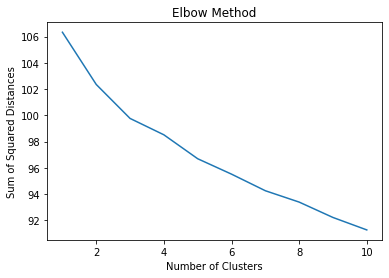

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = encoded_anthems

# Create a list to hold the sum of squared distances for each k
ssd = []

# Fit KMeans for k values from 1 to 10 and calculate the sum of squared distances
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [11]:
NUM_CLSUTERS = 3

In [12]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=NUM_CLSUTERS, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the KMeans model on the data
kmeans.fit(encoded_anthems)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centroids = kmeans.cluster_centers_

# Print the cluster labels and centers
print('Cluster Labels:', labels)
print('Cluster Centers:', centroids)


Cluster Labels: [1 0 2 1 0 0 2 0 2 0 2 2 0 2 1 0 0 0 1 2 1 1 0 0 0 2 0 2 2 0 2 1 1 1 1 0 1
 1 1 0 2 2 1 1 1 1 2 1 1 1 2 1 1 0 1 1 1 2 1 1 1 1 1 2 1 0 0 2 2 2 0 2 1 1
 2 0 1 2 2 0 2 2 2 2 2 0 0 0 2 0 0 0 2 0 0 2 1 0 2 0 1 0 2 0 0 0 0 0 0 1 0
 0 0 0 2 2 0 0 1 2 1 0 0 2 0 1 0 1 1 0 0 0 1 2 1 1 2 0 1 0 2 2 0 0 2 2 0 2
 0 1 0 1 0 0 0 2 0 0 0 0 1 0 2 0 1 0 0 2 0 1 0 2 0 2 1 1 0 2 2 0 0 1 0 0 1
 1 0 1 0 0]
Cluster Centers: [[-0.02880411 -0.05969765 -0.00837182 ...  0.01844318 -0.03840435
  -0.04663413]
 [-0.02614154 -0.04989311  0.00048455 ...  0.03962618 -0.02870089
  -0.03518105]
 [-0.02680658 -0.04330937  0.02770274 ...  0.01388054 -0.03188895
  -0.03997963]]


In [13]:
dataset["cluster"] = labels

dataset["Alpha-2"] = dataset["Alpha-2"].apply(lambda x: str(x).lower())

In [14]:
dataset.shape

(190, 6)

['am', 'by', 'be', 'bg', 'cy', 'ee', 'ge', 'de', 'gr', 'lv', 'li', 'lt', 'mt', 'nl', 'ru', 'es', 'sr', 'ni', 'cr', 'tt', 'gd', 'gl', 'vu', 'ws', 'ki', 'to', 'af', 'bh', 'bt', 'bn', 'in', 'ir', 'il', 'jo', 'kz', 'kw', 'kg', 'la', 'lb', 'my', 'mv', 'mn', 'mm', 'om', 'pk', 'sa', 'sg', 'lk', 'tj', 'tm', 'ae', 'uz', 'bw', 'bi', 'cf', 'td', 'dj', 'gq', 'et', 'gm', 'gh', 'gn', 'ci', 'ke', 'ls', 'lr', 'mg', 'ml', 'mu', 'ma', 'nan', 'ng', 'rw', 'sc', 'za', 'ss', 'sz', 'tz', 'ug', 'zm', 'zw']
['al', 'az', 'fr', 'hu', 'ie', 'it', 'pl', 'pt', 'mk', 'ro', 'rs', 'sk', 'si', 'ua', 'gb', 'ar', 'bo', 'ch', 'co', 'ec', 'py', 'pe', 'uy', 've', 'us', 'mx', 'gt', 'cu', 'ht', 'do', 'sv', 'bz', 'bb', 'ag', 'cn', 'iq', 'mo', 'ps', 'qa', 'sy', 'th', 'tr', 'vn', 'dz', 'ao', 'bf', 'er', 'ga', 'ly', 'mr', 'ne', 'st', 'sn', 'sd', 'tg', 'tn', 'eh']
['at', 'ba', 'hr', 'cz', 'dk', 'fi', 'is', 'lu', 'md', 'me', 'no', 'se', 'ch', 'br', 'gy', 'ca', 'hn', 'pa', 'pr', 'jm', 'bs', 'lc', 'dm', 'bm', 'au', 'pg', 'nz', 'fj', 

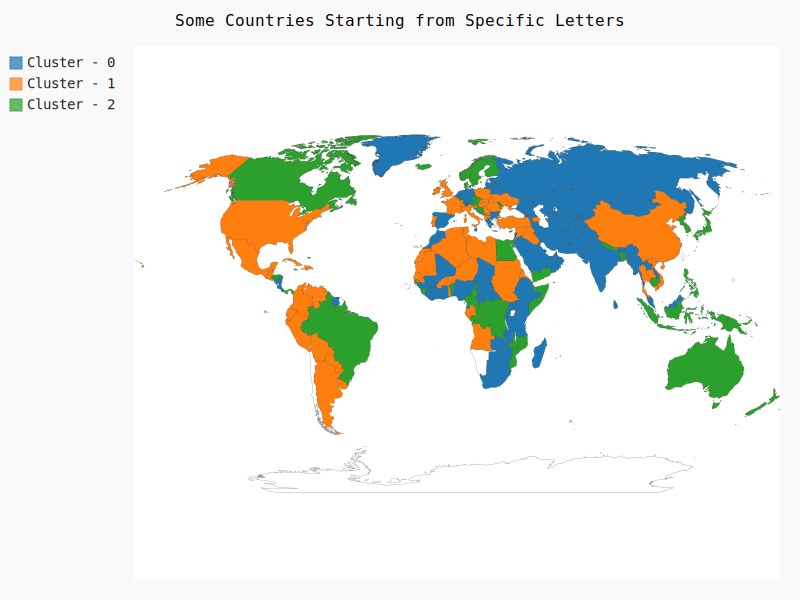

In [15]:
# import pygal
import pygal
  
# import Style class from pygal.style
from pygal.style import Style
  
# create a Style object
custom_style = Style( colors = ('#1f77b4' , '#ff7f0e' ,
                                '#2ca02c' , '#d62728',
                                '#9467bd'))
  
# create a world map,
# Style class is used for using
# the custom colours in the map,
worldmap =  pygal.maps.world.World(style = custom_style)
  
# set the title of the map
worldmap.title = 'Some Countries Starting from Specific Letters'


# worldmap.add('"E" Countries', 
#              ['in'], "india")


for i in range(NUM_CLSUTERS):
  worldmap.add('Cluster - {}'.format(i), dataset[dataset["cluster"] == i]["Alpha-2"].to_list())
  print(dataset[dataset["cluster"] == i]["Alpha-2"].to_list())


# for index, row in dataset.iterrows():
  
#   if isinstance(row['Alpha-2'], str):
#     print(row["Alpha-2"].lower(), row["cluster"])
#     worldmap.add('"E" Countries', ['IN'])

# save into the file
worldmap.render_to_file('abc.svg')
  
print("Success")



from IPython.display import SVG, display

# Load the SVG file
with open('abc.svg', 'rb') as f:
    svg_data = f.read()

# Display the SVG file
display(SVG(svg_data))

In [16]:
dataset.head(50)

,Country,Alpha-2,Alpha-3,Continent,Anthem,cluster
0,Albania,al,ALB,Europe,"Around our flag we stand united, With one wish...",1
1,Armenia,am,ARM,Europe,"Our Fatherland, free, independent, That has fo...",0
2,Austria,at,AUT,Europe,"Land of mountains, land by the river, Land of ...",2
3,Azerbaijan,az,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",1
4,Belarus,by,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",0
5,Belgium,be,BEL,Europe,"O dear Belgium, O holy land of the fathers Ã¢â...",0
6,Bosnia and Herzegovina,ba,BIH,Europe,You're the light of the soul Eternal fire's fl...,2
7,Bulgaria,bg,BGR,Europe,"Proud Balkan Mountains, next to it the Danube ...",0
8,Croatia,hr,HRV,Europe,"Our beautiful homeland, Oh so fearless and gra...",2
9,Cyprus,cy,CYP,Europe,"We knew thee of old, O, divinely restored, By ...",0


In [17]:
"A".lower()

'a'

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

# Sample text
text = "This is a sample sentence, showing off the stop words filtration."

def preprocess(text):

  list_words = ["land", "thy", "thee", "canada", "thou", "shall", "let", "may"]

  # Tokenize the text
  words = word_tokenize(text.lower())

  # Define the stop words to remove
  stop_words = set(stopwords.words('english'))

  # Remove the stop words
  words = [word for word in words if word not in stop_words]

  # Initialize the lemmatizer
  lemmatizer = WordNetLemmatizer()

  # Lemmatize the words
  words = [lemmatizer.lemmatize(word) for word in words]

  # Define the regular expression pattern to match special characters
  pattern = re.compile('[^\w\s]')

  # Remove special characters
  words = [pattern.sub('', word) for word in words]

  # Initialize the stemmer
  # stemmer = PorterStemmer()

  # # Stem the words
  # words = [stemmer.stem(word) for word in words]

  words = [word for word in words if len(word) > 1]

  words = [word for word in words if word not in list_words]

  # Join the words back into a single string
  processed_text = ' '.join(words)
  return processed_text


[('country', 62), ('people', 59), ('god', 54), ('freedom', 39), ('nation', 36), ('flag', 35), ('live', 35), ('one', 34), ('bless', 32), ('peace', 31), ('glory', 30), ('long', 27), ('free', 26), ('unity', 26), ('fatherland', 25), ('hail', 24), ('love', 23), ('africa', 23), ('liberty', 22), ('oh', 21), ('heart', 20), ('motherland', 19), ('world', 19), ('salute', 19), ('together', 18), ('king', 17), ('happiness', 17), ('homeland', 17), ('beloved', 16), ('give', 16), ('great', 16), ('always', 16), ('work', 16), ('good', 16), ('glorious', 15), ('light', 15), ('life', 15), ('protect', 15), ('hand', 14), ('name', 14), ('sing', 14), ('praise', 14), ('stand', 14), ('lord', 14), ('strong', 14), ('forever', 13), ('united', 13), ('call', 13), ('dear', 12), ('german', 12)]
[('people', 52), ('glory', 50), ('one', 46), ('free', 45), ('homeland', 44), ('nation', 42), ('god', 41), ('freedom', 41), ('die', 40), ('arm', 36), ('liberty', 34), ('blood', 33), ('fatherland', 32), ('slave', 31), ('flag', 29),

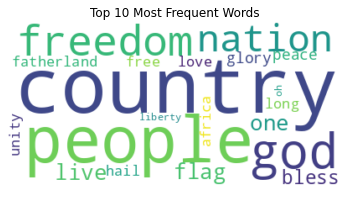

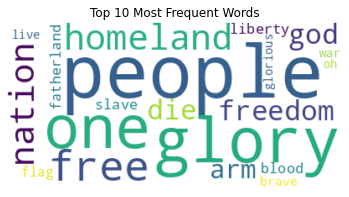

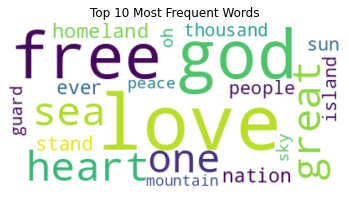

In [19]:
top_words_clusters = []

for i in range(NUM_CLSUTERS):
  # worldmap.add('Cluster - {}'.format(i), dataset[dataset["cluster"] == i]["Alpha-2"].to_list())
  # print(dataset[dataset["cluster"] == i]["Anthem"].to_list())


  # Define a list of sentences
  anthems = dataset[dataset["cluster"] == i]["Anthem"].to_list()

  # Join the sentences into a single string
  text = ' '.join(anthems)

  text = preprocess(text)

  

  # Tokenize the text into words
  tokens = nltk.tokenize.word_tokenize(text)

  # Create a word frequency distribution
  freq_dist = nltk.FreqDist(tokens)



  top_words = freq_dist.most_common(50)
  
  print(top_words)

  top_words_clusters.append(top_words)

for i in range(len(top_words_clusters)):
  # Create a dictionary of word frequencies
  word_freq = {word: freq for word, freq in top_words_clusters[i]}

  # Create a word cloud with word counts displayed
  wordcloud = WordCloud(background_color='white', max_words=20).generate_from_frequencies(word_freq)

  # Set up the plot
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title("Top 10 Most Frequent Words")
  plt.show()


{'country': 62, 'people': 59, 'god': 54, 'freedom': 39, 'nation': 36, 'flag': 35, 'live': 35, 'one': 34, 'bless': 32, 'peace': 31, 'glory': 30, 'long': 27, 'free': 26, 'unity': 26, 'fatherland': 25, 'hail': 24, 'love': 23, 'africa': 23, 'liberty': 22, 'oh': 21, 'heart': 20, 'motherland': 19, 'world': 19, 'salute': 19, 'together': 18, 'king': 17, 'happiness': 17, 'homeland': 17, 'beloved': 16, 'give': 16, 'great': 16, 'always': 16, 'work': 16, 'good': 16, 'glorious': 15, 'light': 15, 'life': 15, 'protect': 15, 'hand': 14, 'name': 14, 'sing': 14, 'praise': 14, 'stand': 14, 'lord': 14, 'strong': 14, 'forever': 13, 'united': 13, 'call': 13, 'dear': 12, 'german': 12}


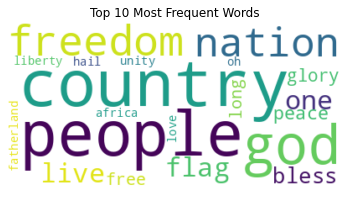

{'people': 52, 'glory': 50, 'one': 46, 'free': 45, 'homeland': 44, 'nation': 42, 'god': 41, 'freedom': 41, 'die': 40, 'arm': 36, 'liberty': 34, 'blood': 33, 'fatherland': 32, 'slave': 31, 'flag': 29, 'brave': 27, 'war': 24, 'live': 24, 'glorious': 24, 'oh': 24, 'world': 24, 'eternal': 23, 'peace': 23, 'arise': 21, 'time': 21, 'hand': 20, 'heart': 20, 'long': 20, 'tyrant': 20, 'victory': 20, 'son': 19, 'march': 19, 'death': 19, 'light': 19, 'country': 19, 'man': 18, 'warrior': 18, 'great': 18, 'like': 18, 'every': 18, 'vow': 18, 'upon': 17, 'hero': 17, 'soldier': 17, 'see': 17, 'cry': 17, 'name': 17, 'enemy': 16, 'song': 16, 'rise': 16}


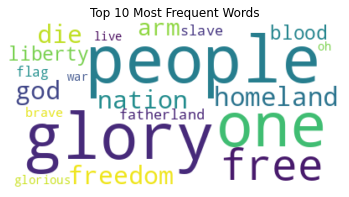

{'love': 51, 'god': 38, 'free': 33, 'heart': 29, 'sea': 29, 'great': 28, 'one': 28, 'homeland': 28, 'ever': 25, 'stand': 25, 'nation': 25, 'sun': 23, 'people': 22, 'island': 22, 'thousand': 21, 'oh': 19, 'guard': 19, 'sky': 18, 'peace': 18, 'mountain': 17, 'home': 17, 'mother': 17, 'dear': 17, 'sing': 17, 'son': 16, 'day': 16, 'new': 16, 'glory': 16, 'world': 15, 'every': 15, 'true': 15, 'indonesia': 14, 'river': 13, 'country': 13, 'long': 13, 'beloved': 13, 'defend': 13, 'beautiful': 12, 'live': 12, 'forever': 12, 'hand': 12, 'give': 12, 'strong': 11, 'see': 11, 'hope': 11, 'light': 11, 'soul': 11, 'hill': 11, 'life': 11, 'year': 11}


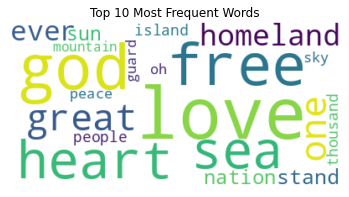

In [20]:
for i in range(len(top_words_clusters)):
  # Create a dictionary of word frequencies
  word_freq = {word: freq for word, freq in top_words_clusters[i]}
  print(word_freq)
  # Create a word cloud with word counts displayed
  wordcloud = WordCloud(background_color='white', max_words=20).generate_from_frequencies(word_freq)

  # Set up the plot
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title("Top 10 Most Frequent Words")
  plt.show()